# CROP: Evaluation Notebook

In this Notebook, we provide the evalautions presented in our paper.
In addition, we also provided further visualizations of our results as well as additional results for the nLDE Benchmark 1.
The structure is as follows:
  
## [Evaluations from the Paper](#paper_evaluations)
1. [Cost Model Parameters](#cost_model_parameter)
2. [Custom Benchmark](#custom_benchmark)
3. [Comparison to the State of the Art](#state_of_the_art)

## [Additional Evaluations and Results](#additional_evaluations)
1. [nLDE Benchmark 1: Q1-Q10](#nlde_general)
1. [nLDE Benchmark 2](#nlde_subsets)
1. [nLDE Benchmark 1: Q11-Q20](#nlde_general_q1120)

In [1]:
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import linregress, pearsonr
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define some hatches,
hatches = ['....', '\\\\', 'xxxx', '---', '++++']
markers = ["o", "^", "s", "+", "x", "d"]

colormap = {
    "blue" : "#01B4F0",
    "gray" : "#f5f5f5",
    "gray2": "#808080"
}

results_dir = "../experimental_results"

<a id='paper_evaluations'></a>
# Evaluations from the Paper

<a id='cost_model_parameter'></a>
# Cost Model Parameters

## Fig. 2a) - Height Discount Factor $\delta$

In [2]:
df_01 = pd.read_csv(f"{results_dir}/01_cost_model_parameter_delta.tsv", sep="\t")
df_01['elapsed_s'] = df_01['execution_time_s'] + df_01['optimization_time_s']
data_list= []
req_time_corr = linregress(df_01['requests'], df_01['elapsed_s'])
for i in range(0,8):
    corr_df = df_01[df_01['delta'] == i]
    cost_req_corr = linregress(corr_df['bc_cost_p_star'], corr_df['requests'])
    req_time_corr = linregress(corr_df['requests'], corr_df['elapsed_s'])
    pcc = pearsonr(corr_df['bc_cost_p_star'], corr_df['requests'])
    data_list.append({
        "height discount" : i,
        "R-value" : round(cost_req_corr.rvalue,2),
        "Runtime (s)" : round(corr_df['elapsed_s'].sum() / 3, 2),
        "Requests" : int(corr_df['requests'].sum() / 3)
    })
table_df = pd.DataFrame(data_list)
table_df.index = table_df['height discount']
table_df.drop(columns=['height discount'], inplace=True)
table_df

,R-value,Runtime (s),Requests
height discount,,,
0,0.27,1236.45,84604
1,0.44,1106.58,81735
2,0.49,971.51,83209
3,0.52,940.97,88763
4,0.52,938.44,88437
5,0.50,995.29,93815
6,0.49,983.64,99157
7,0.49,987.08,99438


Fig. 2a) Mean Runtime, number of requests and the Pearson Correlation Coefficient (PCC) for height discounts $\delta$. 

## Fig. 2b) - Execution Times per Block size $k$

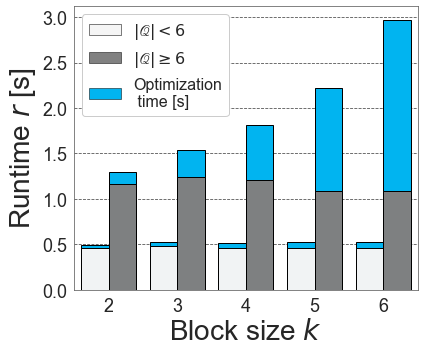

In [3]:
df_02 = pd.read_csv(f"{results_dir}/02_idp_parameter_block_size_k.tsv", sep="\t")
df_02['elapsed_s'] = df_02['execution_time_s'] + df_02['optimization_time_s']
df_02['tp_6'] = False
df_02.loc[df_02['triple_pattern_count'] >= 6, 'tp_6'] = True

params = {'legend.fontsize': 18,
          'legend.handlelength': 2}
plt.rcParams.update(params)
fig=plt.figure(figsize=(6, 5))
sns.set_style("whitegrid", {'grid.color': '.3', 'grid.linestyle': '--', 'axes.edgecolor': '.4',})
bplot1 = sns.barplot(x="idp_k", y="elapsed_s",ci=None, data=df_02, estimator=np.median, facecolor=colormap['blue'], edgecolor=".2", hue="tp_6")
bplot1.set_label("_nolegend_")

bplot = sns.barplot(x="idp_k", y="execution_time_s",ci=None, estimator=np.median, data=df_02, color="k", linewidth=1, facecolor=colormap['gray'], edgecolor=".2",hue="tp_6", alpha=.99)
bplot1.legend().remove()

plt.xlabel("Block size $k$", fontsize=28)
plt.ylabel("Runtime $r$ [s]", fontsize=28)

hatches_bp = ["", "","", ""]
colors_bp = [colormap['blue'], colormap['blue'],colormap['gray'],colormap['gray2']]
patches = bplot.patches
j = int(len(patches)/4)
for i,thisbar in enumerate(patches):
    # Set a different hatch for each bar
    hatch_id = int(i/j)
    thisbar.set_hatch(hatches_bp[hatch_id])
    thisbar.set_color(colors_bp[hatch_id])
    thisbar.set_linewidth(1)
    thisbar.set_edgecolor("k")
#plt.yscale("log")
opt_patch = mpatches.Patch(label='Optimization\n time [s]', edgecolor='black', lw=.5, facecolor=colormap['blue'])
gray_patch = mpatches.Patch(label='$|\mathscr{Q}| < 6$', edgecolor='black', lw=.5, facecolor=colormap['gray'])
hatch_patch = mpatches.Rectangle(xy=(1,1), width=2, height=2,label='$|\mathscr{Q}| \geq 6$', hatch="",facecolor=colormap['gray2'],
                                   edgecolor='black', lw=.5, alpha=.99)
vals = [0, 0.5, 1.0, 1.5, 2.0]
bplot1.set_yticks(vals, [str(val) for val in vals])
plt.tick_params(labelsize=18)
plt.legend(handles=[gray_patch, hatch_patch, opt_patch], fancybox=True, framealpha=1.0, fontsize=16)
plt.tight_layout()

Fig. 2b) Median runtime for queries with $|\mathscr{Q}| < 6$ and $|\mathscr{Q}| \geq 6$ for block sizes $k$. Indicated in blue is the optimization time.

## Fig. 2c) - Request by block size $k$

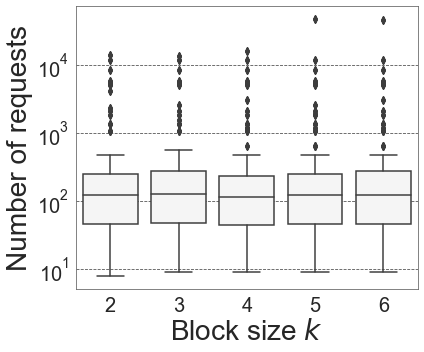

In [4]:
sns.set_style("whitegrid", {'grid.color': '.3', 'grid.linestyle': '--', 'axes.edgecolor': '.4',})
fig=plt.figure(figsize=(6, 5))
pal = [colormap['gray'],colormap['gray'],colormap['gray'],colormap['gray'], colormap['gray'], "k","k","k", colormap['gray']]
bplot = sns.boxplot(x="idp_k", y="requests", data=df_02) #ci=None,
for i in range(0,5):
    mybox = bplot.artists[i]
    mybox.set_facecolor(colormap['gray'])

plt.xlabel("Block size $k$", fontsize=28)
plt.ylabel("Number of requests", fontsize=28)
plt.tick_params(labelsize=20)
plt.yscale("log")
plt.tight_layout()

Fig. 2c) Box plots of the number of requests per query (log-scale) for block sizes $k$.

## Table 1

In [5]:
df_03 = pd.read_csv(f"{results_dir}/03_qpo_parameter_rho_gamma.tsv", sep="\t")
df_03['elapsed_s'] = df_03['execution_time_s'] + df_03['optimization_time_s']
table_1 = pd.pivot_table(index=["cost_threshold"], columns=["robustness_threshold"], 
                                       values=['r_star_selected', 'requests','elapsed_s'], aggfunc=np.sum, 
                                       data=df_03,fill_value=0).div(3) # Divide by 3, since 3 runs
table_1

elapsed_s                                        \
robustness_threshold        0.05        0.10         0.15         0.20   
cost_threshold                                                           
0.1                   556.862512  534.156100  2048.922959  2094.210219   
0.3                   552.440765  533.696159   930.910828   937.665830   
0.5                   957.004847  911.711758   910.641929   908.900058   
0.7                   950.975572  909.638964   910.557857   913.427599   
0.9                   947.873710  915.230470   909.157679   907.566293   

                                  r_star_selected                          \
robustness_threshold         0.25            0.05  0.10  0.15  0.20  0.25   
cost_threshold                                                              
0.1                   2784.257334            16.0  17.0  28.0  31.0  38.0   
0.3                    940.544365            16.0  17.0  10.0  10.0  11.0   
0.5                    911.970343             6.0   6.0   9.0   9.0   9.0   
0.7                    909.341705             6.0   6.0   8.0   5.0   5.0   
0.9                    910.109791             6.0   6.0   7.0   4.0   2.0   

                          requests                               \
robustness_threshold          0.05          0.10           0.15   
cost_threshold                                                    
0.1                   64167.666667  82657.333333   99015.666667   
0.3                   64157.666667  82629.333333  105337.333333   
0.5                   86640.000000  90932.000000   91175.666667   
0.7                   86634.666667  90962.666667   91161.666667   
0.9                   86627.333333  90934.666667   90937.333333   

                                                    
robustness_threshold           0.20           0.25  
cost_threshold                                      
0.1                   103709.000000  124070.000000  
0.3                   105537.666667  105728.666667  
0.5                    91388.666667   91511.333333  
0.7                    91173.333333   91298.666667  
0.9                    90939.000000   90986.333333

Table 1: Mean Runtime (elapsed_s), mean number of requests (requests) and the number of robust plans (r_star_selected) selected by the query plan optimizer. Indicate in bold are best overall runtime and minimum number of requests.

<a id='custom_benchmark'></a>
# Custom Benchmark

## Fig. 3: Results of the custom benchmark. 

In [6]:
df_04 = pd.read_csv(f"{results_dir}/04_custom_benchmark_crop.tsv", sep="\t")
df_04['elapsed_s'] = df_04['execution_time_s'] + df_04['optimization_time_s']

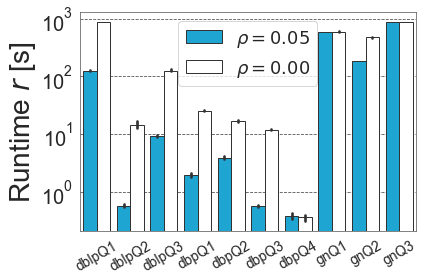

In [7]:
params = {'legend.fontsize': 18,
          'legend.handlelength': 2}
plt.rcParams.update(params)

fig=plt.figure(figsize=(6, 4))
bplot = sns.barplot(x="query", y="elapsed_s", hue="robustness_threshold", data=df_04, palette=[colormap['blue'],'w'],
                   linewidth=1, errcolor=".2", edgecolor=".2",hue_order=[0.05, 0.00])

plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=20)
plt.xlabel("", fontsize=1)
plt.ylabel("Runtime $r$ [s]", fontsize=28,labelpad=3)
plt.legend(fancybox=True, framealpha=1.0)
plt.tight_layout()
plt.yscale("log")
L = plt.legend()
L.get_texts()[0].set_text('$\\rho = 0.05$')
L.get_texts()[1].set_text('$\\rho = 0.00$')
plt.tight_layout()

Fig. 3a) Mean runtime

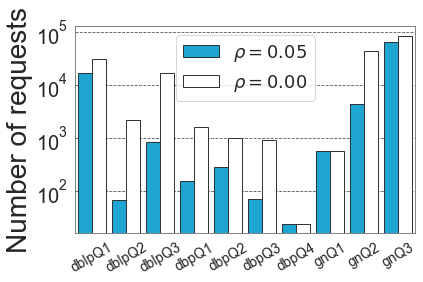

In [8]:
fig=plt.figure(figsize=(6, 4))
bplot = sns.barplot(x="query", y="requests", hue="robustness_threshold", data=df_04, palette=[colormap['blue'],'w'],
                   linewidth=1, errcolor=".2", edgecolor=".2",hue_order=[0.05, 0.00])

plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=20)
plt.xlabel("", fontsize=1)
plt.ylabel("Number of requests", fontsize=28,labelpad=3)
plt.legend(fancybox=True, framealpha=1.0)
plt.tight_layout()
plt.yscale("log")
L = plt.legend()
L.get_texts()[0].set_text('$\\rho = 0.05$')
L.get_texts()[1].set_text('$\\rho = 0.00$')
plt.tight_layout()

Fig. 3b) Mean number of total requests

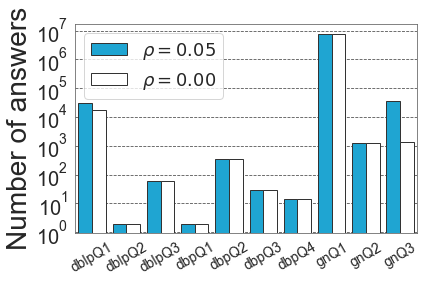

In [9]:
fig=plt.figure(figsize=(6, 4))
bplot = sns.barplot(x="query", y="answers", hue="robustness_threshold", data=df_04, palette=[colormap['blue'],'w'],
                   linewidth=1, errcolor=".2", edgecolor=".2",hue_order=[0.05, 0.00])

plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=20)
plt.xlabel("", fontsize=1)
plt.ylabel("Number of answers", fontsize=28,labelpad=3)
plt.legend(fancybox=True, framealpha=1.0)
plt.tight_layout()
plt.yscale("log")
L = plt.legend()
L.get_texts()[0].set_text('$\\rho = 0.05$')
L.get_texts()[1].set_text('$\\rho = 0.00$')
plt.tight_layout()

Fig. 3c) Mean number of total answers

<a id='state_of_the_art'></a>
# Comparison to the State of the Art

## Fig. 4: Comparison to the State of the Art

In [10]:
df_05 = pd.read_csv(f"{results_dir}/05_runtimes_comunica.tsv", sep="\t")
df_07 = pd.read_csv(f"{results_dir}/07_runtimes_nlde.tsv", sep="\t")
df_09 = pd.read_csv(f"{results_dir}/09_runtimes_crop.tsv", sep="\t")
df_runtimes = pd.concat([df_05, df_07, df_09])

df_06 = pd.read_csv(f"{results_dir}/06_requests_comunica.tsv", sep="\t")
df_08 = pd.read_csv(f"{results_dir}/08_requests_nlde.tsv", sep="\t")
df_10 = pd.read_csv(f"{results_dir}/10_requests_crop.tsv", sep="\t")
df_requests = pd.concat([df_06, df_08, df_10])
df_requests['efficiency'] = df_requests['answers'] / df_requests['requests']

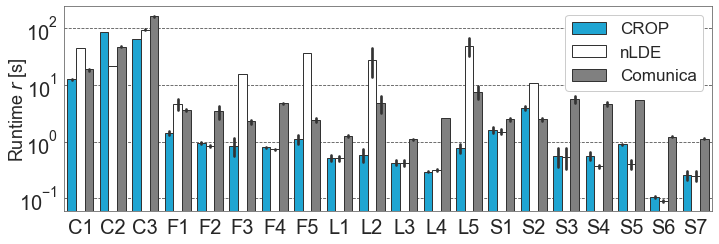

In [11]:
plot_df = df_runtimes[(df_runtimes['benchmark'] == "watdiv") | (df_runtimes['benchmark'] == "WatDiv")]
params = {'legend.fontsize': 14,
          'legend.handlelength': 2}
plt.rcParams.update(params)
fig=plt.figure(figsize=(10, 3.5))
colors_bp = [colormap['blue'], "w", colormap['gray2']]
sns.set_style("whitegrid", {'grid.color': '.3', 'grid.linestyle': '--', 'axes.edgecolor': '.4',})
bplot = sns.barplot(x="querytype", y="runtime_s", hue="engine", data=plot_df, palette=colors_bp,
                   linewidth=1, errcolor=".2", edgecolor=".2", hue_order=["CROP", "nLDE", "Comunica"])
    
plt.tick_params(labelsize=20)
plt.xlabel("", fontsize=1)
plt.ylabel("Runtime $r$ [s]", fontsize=18,labelpad=-10)
plt.yscale("log")
plt.legend(fancybox=True, framealpha=1.0, fontsize=17)
plt.tight_layout()

Fig. 4a) Mean runtime (log-scale) on the WatDiv queries for our approach, nLDE and comunica.

In [12]:
# Prepate Meta: Get requests
meta_tab = df_requests.groupby(['engine'])[['requests', 'answers', "efficiency"]].agg(["sum", "mean"])

# Prepare Runtime: Sum (needs to be divide by number of runs)
runtime_tab_mean = df_runtimes.groupby(['engine'])[['runtime_s']].agg(["sum" ]).div(3)

# Prepare Runtime: Median
runtime_tab_median = df_runtimes.groupby(['engine'])[['runtime_s']].agg(["median"])

# Merge
runtime_meta_df = runtime_tab_mean.merge(runtime_tab_median, left_on='engine', right_on='engine')
final_df = runtime_meta_df.merge(meta_tab, left_on=runtime_meta_df.index, right_on='engine')
final_df.T

0         1         2
engine                 CROP  Comunica      nLDE
runtime_s  sum      540.687   992.569    2815.3
           median  0.714488     2.712  0.702407
requests   sum        64155    204453    151594
           mean     521.585   1662.22   1232.47
answers    sum       456090    456053    438056
           mean     3708.05   3738.14   3561.43
efficiency sum      144.906   26.6209   97.5358
           mean     1.17809  0.218204  0.792974

<a id='diefficiency'></a>
## Diefficiency Analysis

Ranking of engines accoriding to the dieffiency:
Percentage of queries in which the corresponding engines yields the highest (Rank 1), second highest (Rank 2), or lowest dieffiency at $t$, where $t$ is maximum execution time across all engines.

In [13]:
df_12 = pd.read_csv(f"{results_dir}/12_diefficiency_at_tmax_per_query.tsv", sep="\t")
for approach in ["CROP", "nLDE", "comunica"]:
    for rank in [1, 2, 3]:
        val = len(df_12[(df_12['approach'] == approach) & (df_12['rank'] == rank)]) / len(df_12['test'].unique())
        print(f"{approach} with Rank {rank}: {round(val*100, 2)} % of queries")

CROP with Rank 1: 39.09 % of queries
CROP with Rank 2: 59.09 % of queries
CROP with Rank 3: 1.82 % of queries
nLDE with Rank 1: 53.64 % of queries
nLDE with Rank 2: 17.27 % of queries
nLDE with Rank 3: 29.09 % of queries
comunica with Rank 1: 7.27 % of queries
comunica with Rank 2: 23.64 % of queries
comunica with Rank 3: 69.09 % of queries


<a id='additional_evaluations'></a>
# Additional Evaluations and Results

<a id='nlde_general'></a>
## Runtimes: nLDE Benchmark General Q1-Q10

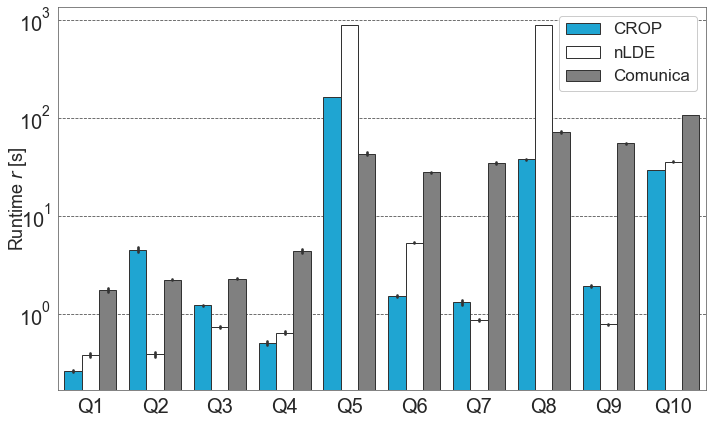

In [14]:
plot_df = df_runtimes[(df_runtimes['benchmark'] == "nLDE") & (df_runtimes['subset'] == "General")]
params = {'legend.fontsize': 14,
          'legend.handlelength': 2}
plt.rcParams.update(params)
fig=plt.figure(figsize=(10, 6))
colors_bp = [colormap['blue'], "w", colormap['gray2']]
sns.set_style("whitegrid", {'grid.color': '.3', 'grid.linestyle': '--', 'axes.edgecolor': '.4',})
bplot = sns.barplot(x="query", y="runtime_s", hue="engine", data=plot_df, palette=colors_bp,
                   linewidth=1, errcolor=".2", edgecolor=".2", hue_order=["CROP", "nLDE", "Comunica"], order=[f"Q{i}" for i in range(1, 11)])
    
plt.tick_params(labelsize=20)
plt.xlabel("", fontsize=1)
plt.ylabel("Runtime $r$ [s]", fontsize=18,labelpad=-10)
plt.yscale("log")
plt.legend(fancybox=True, framealpha=1.0, fontsize=17)
plt.tight_layout()

## Requests: nLDE Benchmark General Q1-Q10

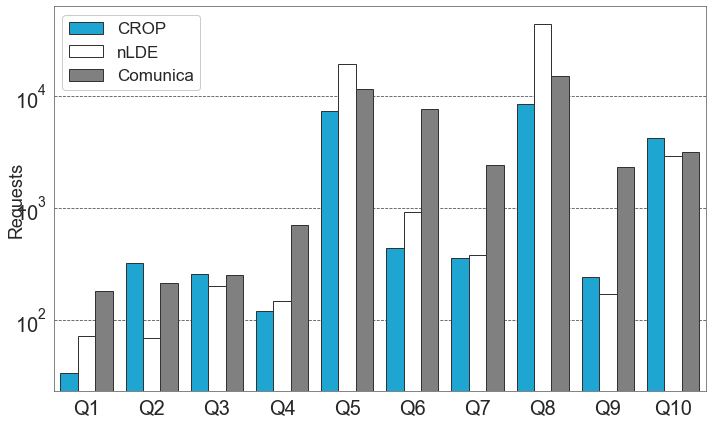

In [15]:
plot_df = df_requests[(df_requests['benchmark'] == "nLDE") & (df_requests['subset'] == "General")]
params = {'legend.fontsize': 14,
          'legend.handlelength': 2}
plt.rcParams.update(params)
fig=plt.figure(figsize=(10, 6))
colors_bp = [colormap['blue'], "w", colormap['gray2']]
sns.set_style("whitegrid", {'grid.color': '.3', 'grid.linestyle': '--', 'axes.edgecolor': '.4',})
bplot = sns.barplot(x="query", y="requests", hue="engine", data=plot_df, palette=colors_bp,
                   linewidth=1, errcolor=".2", edgecolor=".2", hue_order=["CROP", "nLDE", "Comunica"], order=[f"Q{i}" for i in range(1, 11)])
    
plt.tick_params(labelsize=20)
plt.xlabel("", fontsize=1)
plt.ylabel("Requests", fontsize=18,labelpad=-10)
plt.yscale("log")
plt.legend(fancybox=True, framealpha=1.0, fontsize=17)
plt.tight_layout()

<a id='nlde_subsets'></a>
## Runtimes: nLDE Benchmark Subsets 

<Figure size 1296x1440 with 0 Axes>

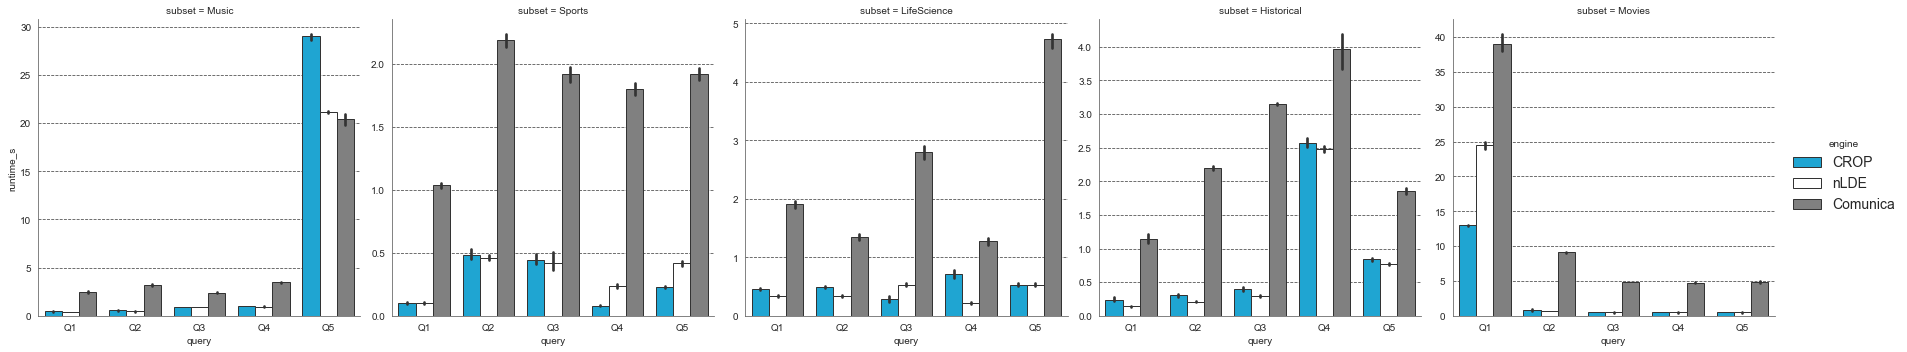

In [16]:
plot_df = df_runtimes[(df_runtimes['benchmark'] == "nLDE") & (df_runtimes['subset'] != "General")]
fig=plt.figure(figsize=(18, 20))
bplot = sns.catplot(kind="bar",x="query", y="runtime_s", hue="engine", col="subset", data=plot_df, sharey=False,
                   palette=colors_bp,
                   linewidth=1 ,errcolor=".2", edgecolor=".2", 
                    legend=True, hue_order=["CROP", "nLDE", "Comunica"])

## Requests: nLDE Benchmark Subsets 

<Figure size 1296x1440 with 0 Axes>

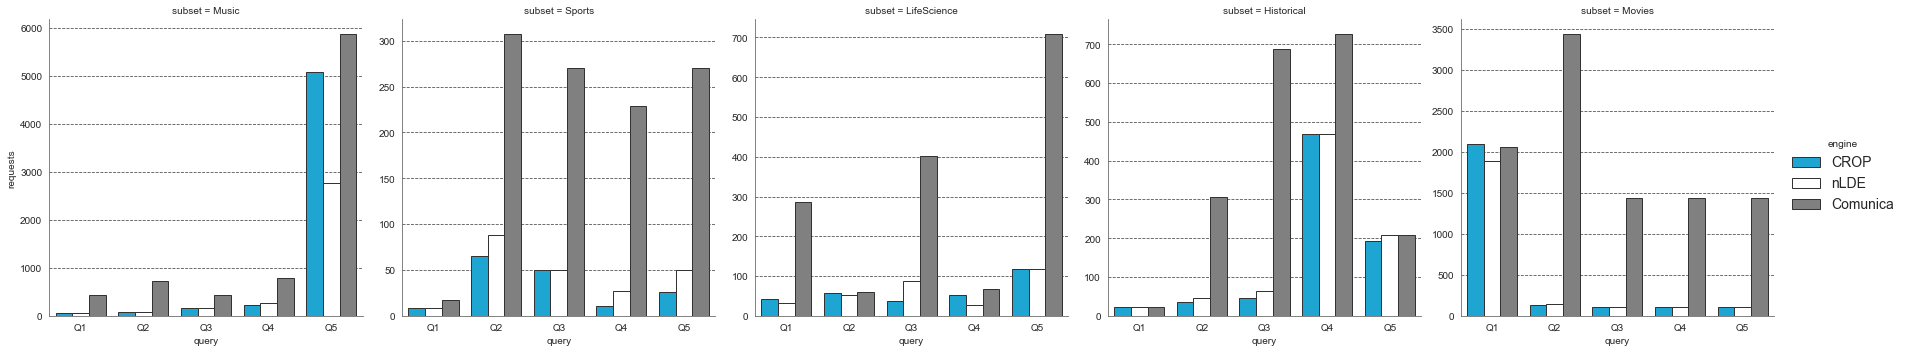

In [17]:
plot_df = df_requests[(df_requests['benchmark'] == "nLDE") & (df_requests['subset'] != "General")]
fig=plt.figure(figsize=(18, 20))
bplot = sns.catplot(kind="bar",x="query", y="requests", hue="engine", col="subset", data=plot_df, sharey=False,
                   palette=colors_bp,
                   linewidth=1 ,errcolor=".2", edgecolor=".2", 
                    legend=True, hue_order=["CROP", "nLDE", "Comunica"])

<a id='nlde_general_q1120'></a>
## nLDE Benchmark 1: Q11-Q20

In the following, we present additional results for the engines on the queries Q11 to Q20 of the nLDE Benchmark 1.
Due to the large number of executions that time out (CROP 4/10, nLDE 3/10, and Comunica 4/10), we omitted these queries in the analysis of our paper as they would skew the results.
Furthermore, performances are comparable to those results of the other benchmark queries.

In [18]:
df_13 = pd.read_csv(f"{results_dir}/13_runtimes_nLDE_Q11_20_crop.tsv", sep="\t")
df_14 = pd.read_csv(f"{results_dir}/14_runtimes_nLDE_Q11_20_nlde.tsv", sep="\t")
df_15 = pd.read_csv(f"{results_dir}/15_runtimes_nLDE_Q11_20_comunica.tsv", sep="\t")
df_runtimes_q1120 = pd.concat([df_13, df_14,df_15]) 

### Runtimes

In [19]:
df_runtimes_q1120.groupby(['engine'])['runtime_s'].agg(["mean", "median", "sum"])

,mean,median,sum
engine,,,
CROP,377.613810,57.857179,11328.414314
Comunica,462.039800,392.971000,13861.194000
nLDE,293.193597,104.892556,8795.807916


**Table:** Mean, Median and total runtime of the engines for queries Q11-Q20 of the nLDE Benchmark

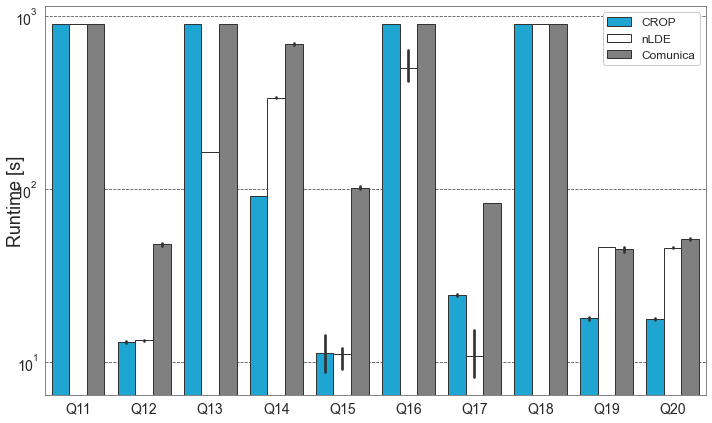

In [20]:
fig=plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': '.3', 'grid.linestyle': '--', 'axes.edgecolor': '.4',})
bplot = sns.barplot(x="query", y="runtime_s", hue="engine", data=df_runtimes_q1120, palette=colors_bp,
                   linewidth=1, errcolor=".2", edgecolor=".2", hue_order=["CROP", "nLDE", "Comunica"], order=[f"Q{i}" for i in range(11, 21)])
    
plt.tick_params(labelsize=14)
plt.xlabel("", fontsize=1)
plt.ylabel("Runtime [s]", fontsize=18,labelpad=-10)
plt.yscale("log")
plt.legend(fancybox=True, framealpha=1.0, fontsize=12, loc=1)
plt.tight_layout()

**Figure:** Mean runtimes per query for all engines 

### Answers

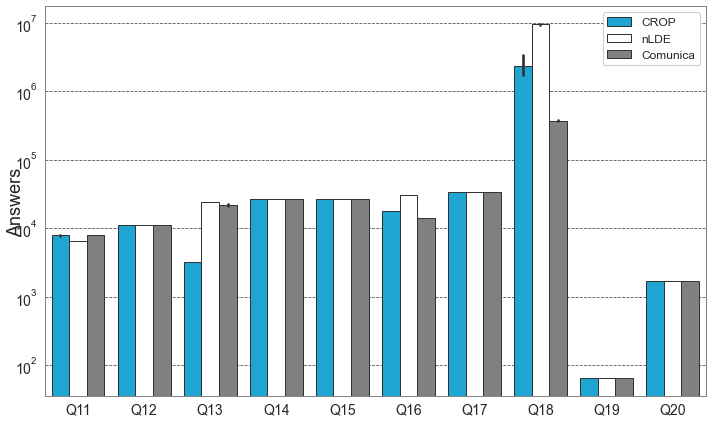

In [21]:
fig=plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': '.3', 'grid.linestyle': '--', 'axes.edgecolor': '.4',})
bplot = sns.barplot(x="query", y="answers", hue="engine", data=df_runtimes_q1120, palette=colors_bp,
                   linewidth=1, errcolor=".2", edgecolor=".2", hue_order=["CROP", "nLDE", "Comunica"], order=[f"Q{i}" for i in range(11, 21)])
    
plt.tick_params(labelsize=14)
plt.xlabel("", fontsize=1)
plt.ylabel("Answers", fontsize=18,labelpad=-10)
plt.yscale("log")
plt.legend(fancybox=True, framealpha=1.0, fontsize=12, loc=1)
plt.tight_layout()